In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
mydigits = datasets.load_digits()

In [2]:
mydigits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = mydigits.data
X.shape   # 可见,数据有64个特征

(1797, 64)

In [4]:
y = mydigits.target
y.shape

(1797,)

将数据分为训练数据集和测试数据集

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# 1.直接使用KNN算法对数字进行识别

In [6]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
%time Knn.fit(X_train, y_train)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 11.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
Knn.score(X_test,y_test)

0.9866666666666667

# 2.用PCA降维后,再对数字进行识别

In [8]:
from sklearn.decomposition import PCA
# 先将样本数据降到2维,比较准确率和运行时间
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# 产生降维后的 训练数据集和测试数据集
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [10]:
# 利用降维后的 训练数据集和测试数据集,使用KNN 算法,对手写数字进行识别。
Knn1 = KNeighborsClassifier()
%time Knn1.fit(X_train_reduction, y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.24 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
Knn1.score(X_test_reduction, y_test)

0.6066666666666667

与直接使用 KNN相比,先对数据降维,再使用KNN的方法运行速度更快,但是识别的准确率差强人意,    
原因为：原始样本数据总共有64维,而我们只保留了2维,即丢失的信息太多。   
那末, 降到多少维合适呢？用什么方法来寻找最优的维度呢？    
遍历是一种选择,但是开销很大,若从 n_components 从1遍历到64, 相当于我们执行了64遍PCA, 和64遍KNN算法.故,其不是最佳选择.     
sklearn.decomposition.PCA 其中一个Attributes 为：  

explained_variance_ratio_ : array, shape (n_components,)
Percentage of variance explained by each of the selected components.每个选定components解释的方差的百分比。
If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0.   如过不降维度的话解释的方差就为1（即将原始数据的方差归一化） 

In [13]:
pca.explained_variance_ratio_  # 可见我们仅用两个维度可解释的方差还是比较有限,总共才为原始数据方差的0.28

array([0.14566817, 0.13735469])

In [14]:
# 用pca.explained_variance_ratio_ 属性来确定 最佳的 n_n_components
pca1 = PCA(n_components= X.shape[1])
pca1.fit(X_train)
pca1.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

In [15]:
pca1.explained_variance_ratio_.shape

(64,)

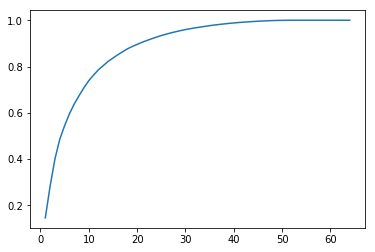

In [41]:
# 可视化, 依次将explained_variance_ratio_相加

plt.plot(np.arange(1,len(pca1.explained_variance_ratio_)+1),
         [np.sum(pca1.explained_variance_ratio_[:i]) for i in range(1,len(pca1.explained_variance_ratio_)+1)])
plt.show()

可以看出 在n_components=30 ，即样本数据映射到30维空间中的方差 与 原始数据(在64维的方差大致相同)。

另外,看官方文档可以发现：    
Parameters:	   
n_components : int, float, None or string       
if n_components == ‘mle’ and svd_solver == ‘full’, Minka’s MLE is used to guess the dimension if 0 < n_components < 1 and svd_solver == ‘full’, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components    
即如果 0 < n_components < 1,此时n_component代表的不再是the number of components,而是降维之后的方差所占原始样本数据方差的百分比, 目的为选择the number of components ，以满足n_components指定的方差百分比    

Attributes:   
n_components_ : int

The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or n_features if n_components is None.

In [43]:
pca2 = PCA(n_components=0.95)
pca2.fit(X_train)
pca2.n_components_   # 可以看到将数据映射到28维空间的方差 便可以得到原始样本数据(64维)空间方差的95%

28

In [44]:
X_train_reduction2 = pca2.transform(X_train)
X_test_reduction2 = pca2.transform(X_test)

In [45]:
Knn2 = KNeighborsClassifier()
%time Knn2.fit(X_train_reduction2,y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.73 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
Knn2.score(X_test_reduction2,y_test)

0.98

选取适当的n_components, 使用PCA之后, 再使用KNN算法对手写数字进行识别,节省了一半的运行时间,且识别的准确率与不对数据降维直接用KNN算法的准确率大致相同.